In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
import astropy
import h5py
import seaborn as sns
from scipy.stats import gmean
from matplotlib.image import NonUniformImage

In [2]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.cosmology import z_at_value
cosmo = FlatLambdaCDM(H0=67.74, Om0=0.3089, Tcmb0=2.725)

In [3]:


def x_mean_plotter(x, y, xbins=10, color='red', marker='o', plt_type=True, xgmean=True, ygmean=True, plot=True):
    
    start = min(x)
    stop = max(x)
    
    if xgmean:
        values = np.logspace(np.log10(start), np.log10(stop), xbins)
    else:
        values = np.linspace(start, stop, xbins)
    x_mean = []
    y_mean = []

    for i in range(len(values)-1):
        mask_x = ((x > values[i]) & (x <= values[i+1]))
        x_slice = values[i:i+2]
        if xgmean:
            x_mean.append(gmean(x_slice))
        else:
            x_mean.append(np.mean(x_slice))
        if ygmean:   
            y_mean.append(gmean(y[mask_x]))
        else:
            y_mean.append(np.mean(y[mask_x]))
        if plot:
            if plt_type:
                plt.plot(x_mean, y_mean, color=color, marker=marker)
            else:
                plt.scatter(x_mean, y_mean, color=color, marker=marker)

    return x_mean, y_mean


In [4]:
def y_mean_plotter(x, y, ybins=10, color='orange', marker='o', plt_type=True, xgmean=True, ygmean=True, plot=True):
    
    start = min(y)
    stop = max(y)
    
    if ygmean:
        values = np.logspace(np.log10(start), np.log10(stop), ybins)
    else:
        values = np.linspace(start, stop, ybins)
    x_mean = []
    y_mean = []

    for i in range(len(values)-1):
        mask_y = ((y > values[i]) & (y <= values[i+1]))
        y_slice = values[i:i+2]
        if ygmean:
            y_mean.append(gmean(y_slice))
        else:
            y_mean.append(np.mean(y_slice))
        if xgmean:   
            x_mean.append(gmean(x[mask_y]))
        else:
            x_mean.append(np.mean(x[mask_y]))
        if plot:
            if plt_type:
                plt.plot(x_mean, y_mean, color=color, marker=marker)
            else:
                plt.scatter(x_mean, y_mean, color=color, marker=marker)

    return x_mean, y_mean


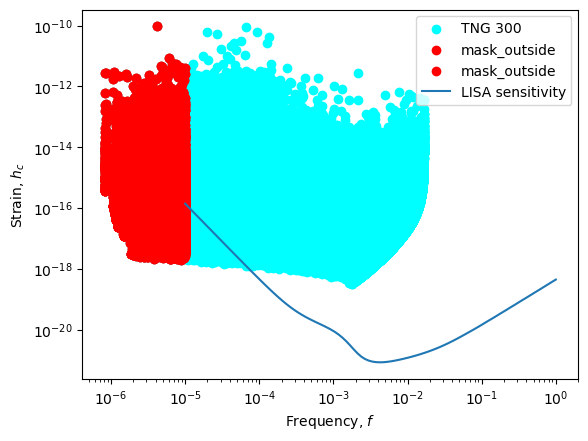

In [27]:

x = []
y = []
for line in open('LISAstrain.txt', 'r'):
    lines = [i for i in line.split()]
    x.append(float(lines[0]))
    y.append(float(lines[1]))

    
merger_file="blackhole_mergers_tng300.hdf5"
merger_data=h5py.File(merger_file, 'r')
M_1=np.maximum(merger_data['mass_out'],merger_data['mass_in'])*1e10/.6774
M_2=np.minimum(merger_data['mass_out'],merger_data['mass_in'])*1e10/.6774

M=M_1+M_2
M_o=1
z=np.array(merger_data['time'])**(-1)-1
mu=(M_1*M_2)**(3/5)/M**(1/5)
#G=scipy.constants.gravitational_constant
#c=scipy.constants.speed_of_light
d_l=cosmo.luminosity_distance(z).value
pi=scipy.constants.pi
f_c=3.9*(M/(10**4*M_o))**-1*(1+z)**-1
h_c=8/(10**(1/2))*(mu)**(5/3)/(d_l*3.086e22)*(pi*f_c)**(2/3)

mask_outside=((np.min(x)>f_c) | (np.max(x)<f_c))
plt.scatter(f_c,h_c,label='TNG 300', c='cyan')
plt.scatter(f_c[mask_outside],h_c[mask_outside], label='mask_outside', c='red')
plt.scatter(f_c[mask_outside],h_c[mask_outside], label='mask_outside', c='red')


plt.xlabel('Frequency, $f$')
plt.ylabel('Strain, $h_c$')
#plt.yticks(y)
plt.plot(x, y, label='LISA sensitivity')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='upper right')
plt.show()


In [6]:
np.save('f_c_300.npy',f_c )
np.save('h_c_300.npy',h_c )


In [7]:
h_interp= np.interp(f_c, x, y)
snr= h_c/h_interp
Mask=((np.min(x)<f_c) & (np.max(x)>f_c))
mask_outside=((np.min(x)>f_c) | (np.max(x)<f_c))
print(snr[Mask]) 
np.save('snr_300.npy',snr )



[1.06520453e+02 1.09627193e+02 1.20902266e+02 ... 2.28926507e+07
 2.18856361e+06 3.12000501e+04]


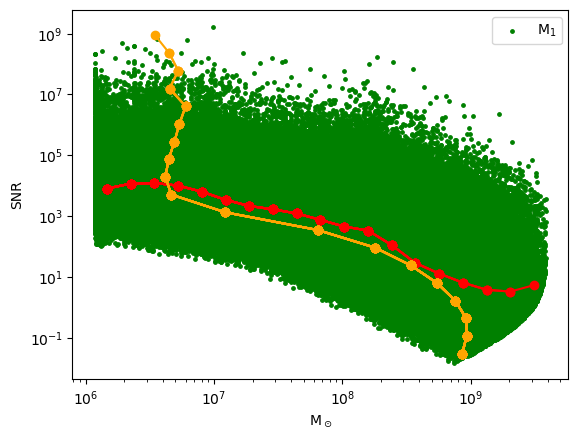

In [28]:
plt.scatter(M_1[Mask], snr[Mask], c='g', label='M$_1$', marker='o', s=6)
x_mean_plotter(M_1[Mask], snr[Mask], xbins=20)
y_mean_plotter(M_1[Mask], snr[Mask], ybins=20)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('M$_\odot$')
plt.ylabel('SNR')
plt.legend(loc='upper right')
plt.show()

In [9]:
'$there are vertical straght lines, when the simulation puts the the blackhole they merge with some the equal mass, and we can see the second vertical line for that. WE can see some vertical lines in the end of the simulation, which represent big blackholes, as after their mergers their mass does not change that much$' 

'$there are vertical straght lines, at the begining when the simulation puts the the blackhole they merge with some the equal mass, and we can see the second vertical line for that. WE can see some vertical lines in the end of the simulation, which represent big blackholes, as after their mergers their mass does not change that much$'

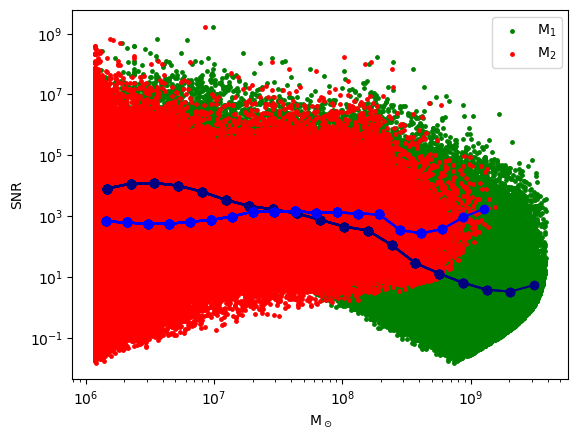

In [30]:

plt.scatter(M_1[Mask], snr[Mask], c='g', label='M$_1$', marker='o', s=6)
x_mean_plotter(M_1[Mask], snr[Mask],color='navy', xbins=20)

plt.scatter(M_2[Mask], snr[Mask], c='r', label='M$_2$', marker='o', s=6)
x_mean_plotter(M_2[Mask], snr[Mask],color='blue', xbins=20)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('M$_\odot$')
plt.ylabel('SNR')
plt.legend(loc='upper right')
plt.show()


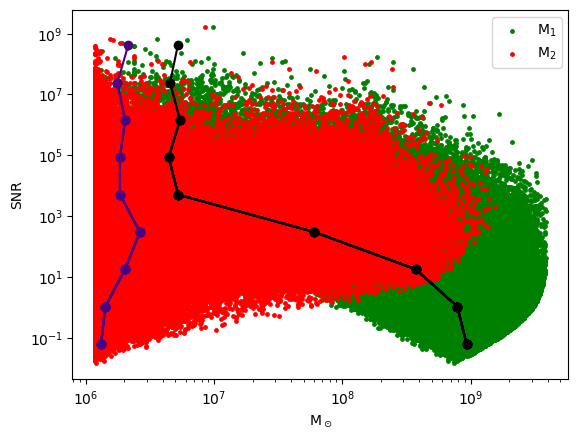

In [11]:
plt.scatter(M_1[Mask], snr[Mask], c='g', label='M$_1$', marker='o', s=6)
y_mean_plotter(M_1[Mask], snr[Mask],color='black')
plt.scatter(M_2[Mask], snr[Mask], c='r', label='M$_2$', marker='o', s=6)
y_mean_plotter(M_2[Mask], snr[Mask],color='indigo')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('M$_\odot$')
plt.ylabel('SNR')
plt.legend(loc='upper right')
plt.show()

In [12]:
'$there are vertical straght lines, at the begining when the simulation puts the the blackhole they merge with some the equal mass, and we can see the second vertical line for that$'

'$there are vertical straght lines, at the begining when the simulation puts the the blackhole they merge with some the equal mass, and we can see the second vertical line for that$'

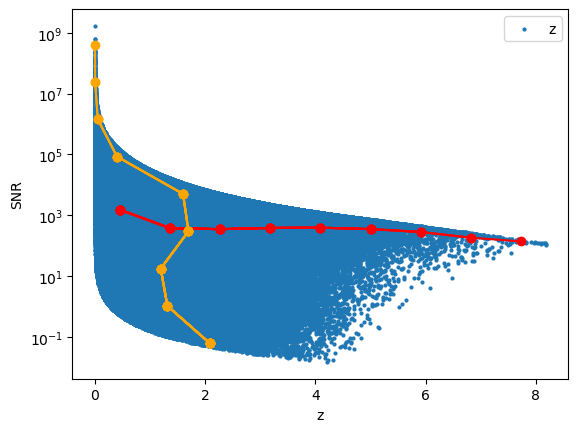

In [13]:
plt.scatter(z[Mask], snr[Mask], label='z', marker='o',s=4)
x_mean_plotter(z[Mask], snr[Mask],xgmean=False)
y_mean_plotter(z[Mask], snr[Mask],xgmean=False)

#plt.scatter(z[M_2>3e6], snr[M_2>3e6], label='z', marker='o',s=4, color='red')


plt.xlabel('z')
plt.ylabel('SNR')
plt.yscale('log')
 
plt.legend(loc='upper right')
plt.show()

In [14]:
'Average snr at any redshift is around 1e3'

'Average snr at any redshift is around 1e3'

In [15]:
#we can see a upper & lower limit of the function

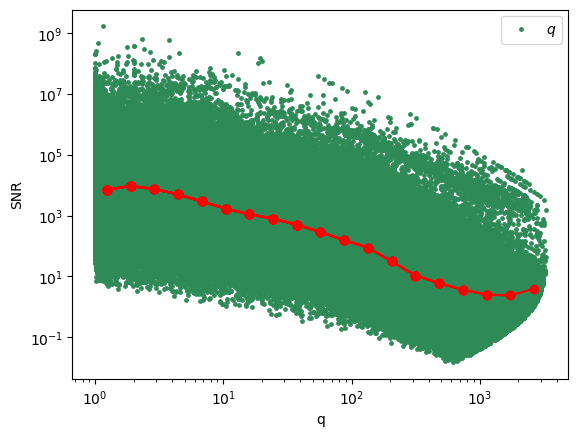

In [16]:
q=M_1/M_2
plt.scatter(q[Mask], snr[Mask], c='seagreen', label='$q$', marker='o', s=6)

x_mean_plotter(q[Mask], snr[Mask], xbins=20)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('q')
plt.ylabel('SNR')
#plt.scatter(values, np.ones(len(values))*1e4, color='yellow')
plt.legend(loc='upper right')
plt.show()


In [17]:
#It lools similar to M1 vs SNR graph.Dont know why?



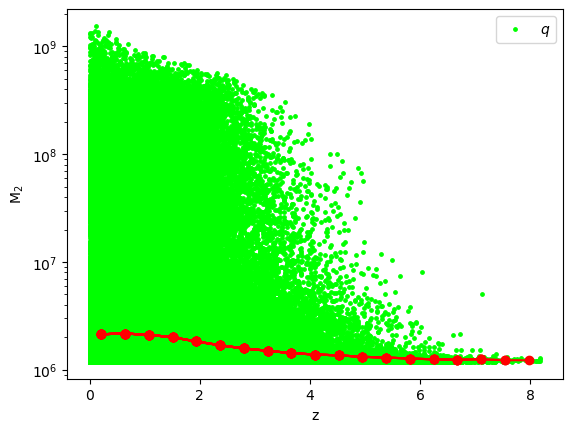

In [18]:
plt.scatter( z[Mask],M_2[Mask], c='lime', label='$q$', marker='o', s=6)
x_mean_plotter(z[Mask],M_2[Mask], xbins=20, xgmean=False)


plt.yscale('log')

plt.xlabel('z')
plt.ylabel('M$_2$')
plt.legend(loc='upper right')
plt.show()
plt.savefig('zvM_2.png',dpi=400)

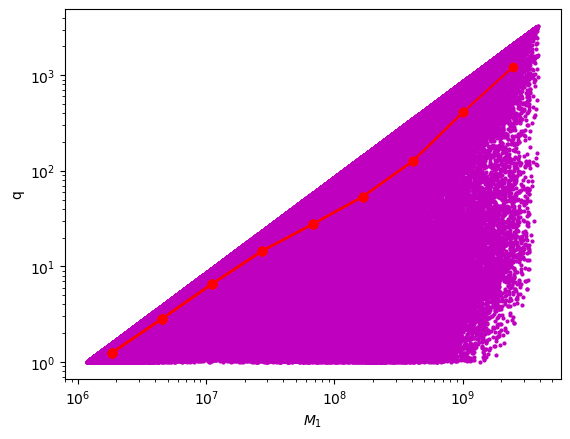

In [19]:
#plt.figure(figsize=[10,8])
plt.scatter(M_1[Mask],q[Mask], c='m', marker='o', s=4)
x_mean_plotter(M_1[Mask],q[Mask])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$M_1$')
plt.ylabel('q')
plt.savefig('M_1vq.png',dpi=400)

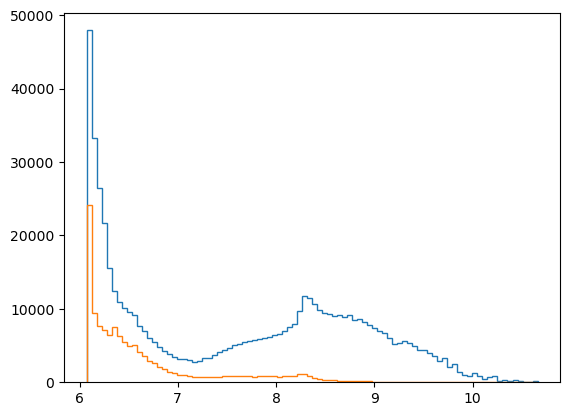

In [20]:
histdata =plt.hist(np.log10(M_1), bins=90, histtype='step', density=False)
histdata2 =plt.hist(np.log10(M_1[snr > 10000]), bins=90, histtype='step', density=False)

#sns.kdeplot(np.log10(M_2),
#   fill=True, common_norm=False,
#   alpha=.5, linewidth=0)
#histdata2 =plt.hist(np.log10(M_1[0:300]), bins=20, histtype='step', density='true')

#plt.plot(histdata[1][1:21], histdata[0][0:20])

In [21]:
print(np.log10(min(M_2)))

6.072187427588813


In [22]:
print(histdata[0])
print(histdata[1])

[47960. 33242. 26483. 21682. 15597. 12468. 10994. 10164.  9563.  9143.
  7685.  7008.  5969.  5468.  4788.  4289.  3816.  3486.  3186.  3145.
  2990.  2827.  2928.  3290.  3368.  3677.  4076.  4447.  4735.  5036.
  5225.  5440.  5618.  5796.  5917.  6071.  6234.  6378.  6582.  7025.
  7583.  7939.  9702. 11696. 11530. 10673.  9883.  9420.  9349.  9095.
  9139.  8926.  9104.  8432.  8566.  8236.  7746.  7334.  6923.  6778.
  6051.  5219.  5414.  5556.  5363.  4945.  4390.  4401.  3931.  3573.
  2899.  3252.  2140.  2545.  1440.  1007.   797.  1206.   894.   451.
   763.   798.   224.   367.   237.   250.   149.    69.     0.   147.]
[ 6.07224478  6.12323949  6.1742342   6.22522891  6.27622362  6.32721833
  6.37821303  6.42920774  6.48020245  6.53119716  6.58219187  6.63318658
  6.68418128  6.73517599  6.7861707   6.83716541  6.88816012  6.93915482
  6.99014953  7.04114424  7.09213895  7.14313366  7.19412837  7.24512307
  7.29611778  7.34711249  7.3981072   7.44910191  7.50009662  7.5510

In [23]:
print(len(histdata[1]), len(histdata[0]))

91 90


<Axes: ylabel='Density'>

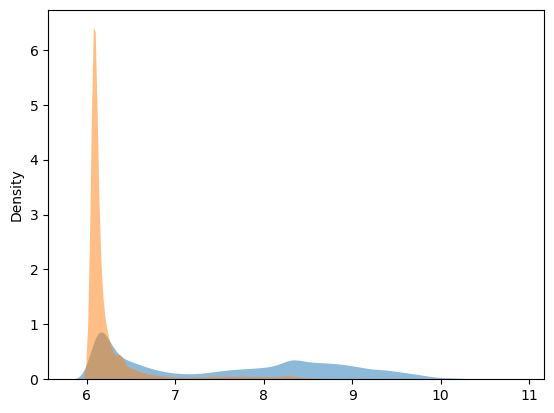

In [24]:
sns.kdeplot(np.log10(M_1),fill=True, common_norm=False,alpha=.5, linewidth=0)
sns.kdeplot(np.log10(M_2),fill=True, common_norm=False,alpha=.5, linewidth=0)


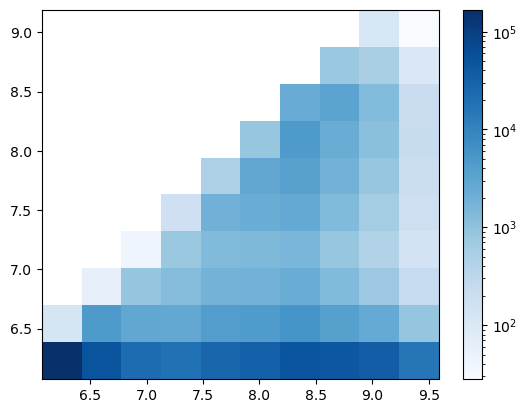

In [25]:
plt.hist2d(np.log10(M_1[Mask]),np.log10(M_2[Mask]), bins=10, density=False, cmap='Blues',norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()

KeyboardInterrupt: 

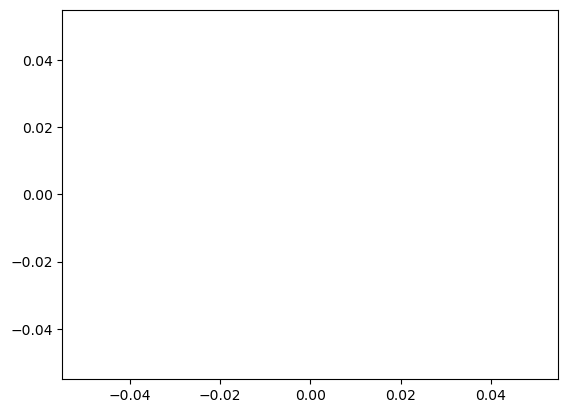

In [26]:
sns.kdeplot(x=np.log10(M_1),y=np.log10(M_2), fill=True)
#plt.show()

In [ ]:
sns.jointplot(x=np.log10(M_1),y=np.log10(M_2), kind='hex')


In [ ]:
sns.color_palette("Spectral", as_cmap=True)

In [ ]:
#Mean
#for i in range(len)

Text(0, 0.5, 'Number Of Mergers')

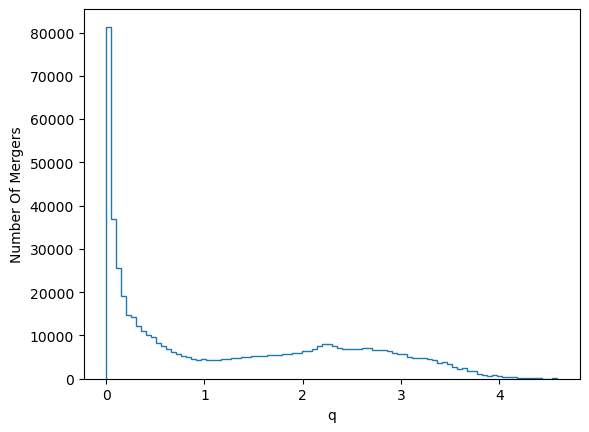

In [34]:
histdata =plt.hist(np.log10(q), bins=90, histtype='step', density=False)

plt.xlabel('q')
plt.ylabel('Number Of Mergers')

Text(0, 0.5, 'Number Of Mergers')

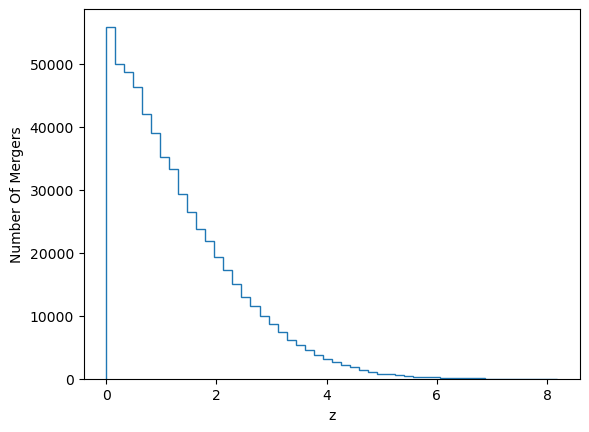

In [35]:
histdata =plt.hist(z, bins=50, histtype='step', density=False)
plt.xlabel('z')
plt.ylabel('Number Of Mergers')

In [36]:
'we can see that most blackhole mergers happened when the redshift is low, which is understandable '

'we can see that most blackhole mergers happened when the redshift is low, which is understandable '

<Axes: ylabel='Density'>

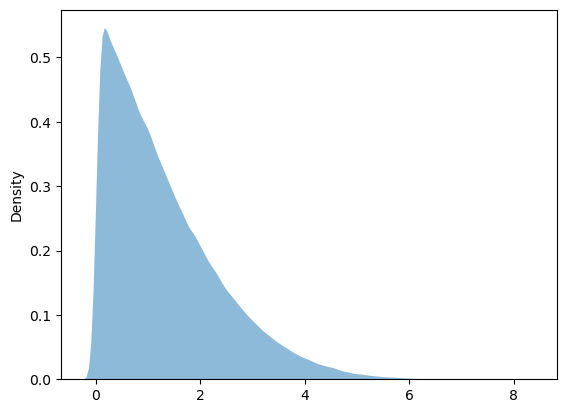

In [37]:
sns.kdeplot(z,fill=True, common_norm=False,
   alpha=.5, linewidth=0)

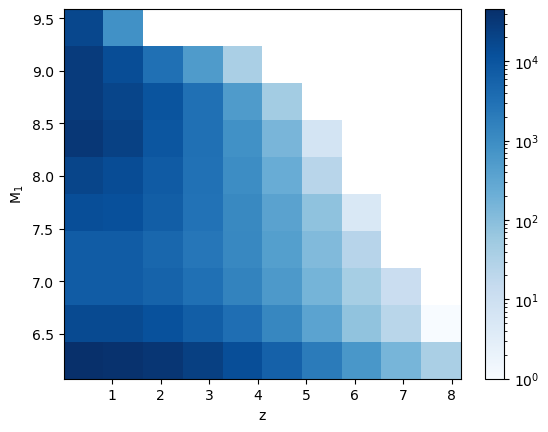

In [38]:
plt.hist2d(z[Mask],np.log10(M_1[Mask]), bins=10, density=False, cmap='Blues',norm=matplotlib.colors.LogNorm())
plt.xlabel('z')
plt.ylabel('M$_1$')
plt.colorbar()
plt.show()

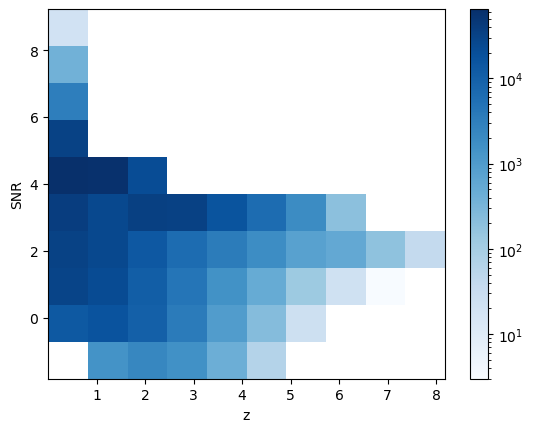

In [39]:
plt.hist2d(z[Mask],np.log10(snr[Mask]), bins=10, density=False, cmap='Blues',norm=matplotlib.colors.LogNorm())
plt.xlabel('z')
plt.ylabel('SNR')
plt.colorbar()
plt.show()

In [40]:
print(snr[Mask])
print(np.max(snr[Mask]))
print(np.min(snr[Mask]))

[1.06520453e+02 1.09627193e+02 1.20902266e+02 ... 2.28926507e+07
 2.18856361e+06 3.12000501e+04]
1695046980.7974346
0.014976627623853992


In [41]:
def calculate_mean(numbers):
    total = 0
    count = 0

    for i2 in numbers:
        total += i2
        count += 1

    mean = total / count
    return mean

result = calculate_mean(M_1)
print("Mean:", result)




Mean: 662984215.4722584


[2124312.1117427447, 6873301.713204885, 22238858.48957884, 71954767.52742521, 232812694.60624537, 753275323.2669668, 2437254178.0964117, 7885839008.884054, 25514965748.302643]


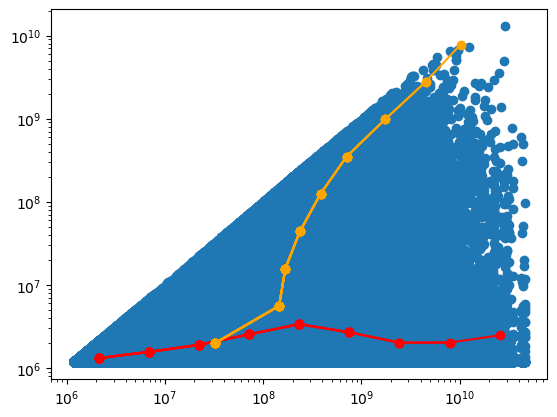

In [42]:
plt.scatter(M_1,M_2)
meanx, meany=x_mean_plotter(M_1,M_2)
y_mean_plotter(M_1,M_2)
plt.xscale('log')
plt.yscale('log')
print(meanx)

In [43]:
#np.save('snr_50.npy', snr_50)

##Later on:
#snr_50=np.load('snr_50.npy')

Text(0, 0.5, 'Number of Mergers')

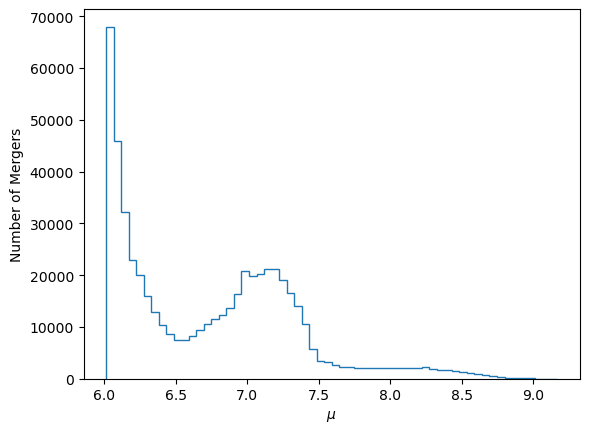

In [44]:
histdata =plt.hist(np.log10(mu[Mask]), bins=60, histtype='step', density=False)
plt.xlabel('$\mu$')
plt.ylabel('Number of Mergers')


Text(0, 0.5, 'Number of Mergers')

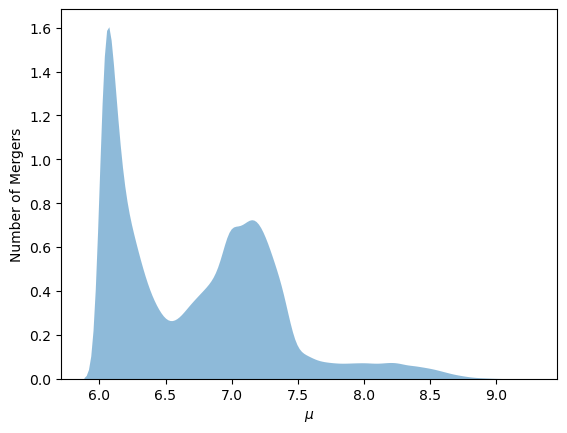

In [45]:
sns.kdeplot(np.log10(mu[Mask]),fill=True, common_norm=False,alpha=.5, linewidth=0)
plt.xlabel('$\mu$')
plt.ylabel('Number of Mergers')

In [46]:
#mu=(M_1*M_2)**(3/5)/M**(1/5)

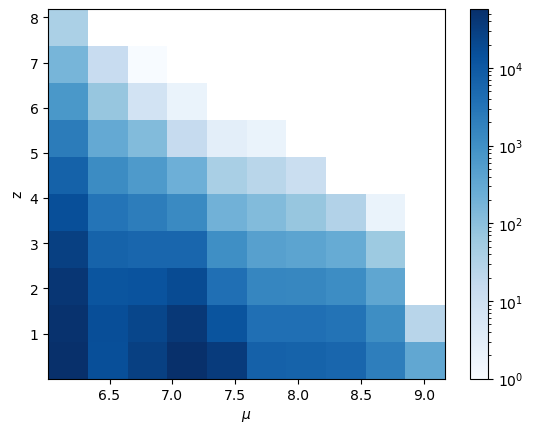

In [47]:
plt.hist2d(np.log10(mu[Mask]),z[Mask], bins=10, density=False, cmap='Blues',norm=matplotlib.colors.LogNorm())
plt.xlabel('$\mu$')
plt.ylabel('z')
plt.colorbar()
plt.show()

Text(0, 0.5, 'z')

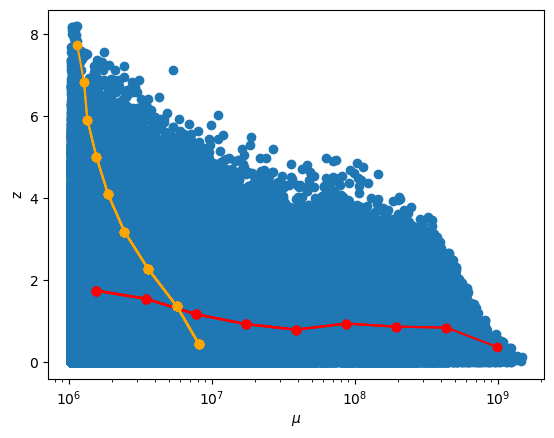

In [48]:
plt.scatter(mu[Mask], z[Mask])

x_mean_plotter(mu[Mask],z[Mask],ygmean=False)
y_mean_plotter(mu[Mask],z[Mask],ygmean=False)
plt.xscale('log')
plt.xlabel('$\mu$')
plt.ylabel('z')

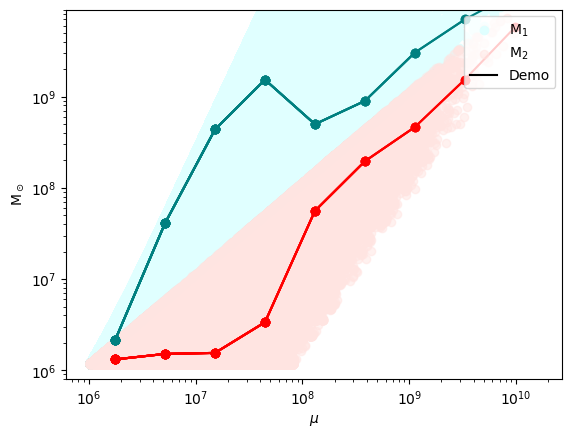

In [49]:
plt.scatter(mu,M_1, color='lightcyan',label='M$_1$')
x_mean_plotter(mu,M_1, color='teal')
plt.scatter(mu,M_2, alpha=.5, color='mistyrose',label='M$_2$')
x_mean_plotter(mu,M_2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\mu$')
plt.ylabel('M$_\odot$')
plt.ylim(8e5,9e9)
plt.plot([1e6,1e7], [1e10,1e10], color='black', label='Demo')

plt.legend(loc='upper right')


Text(0, 0.5, 'SNR')

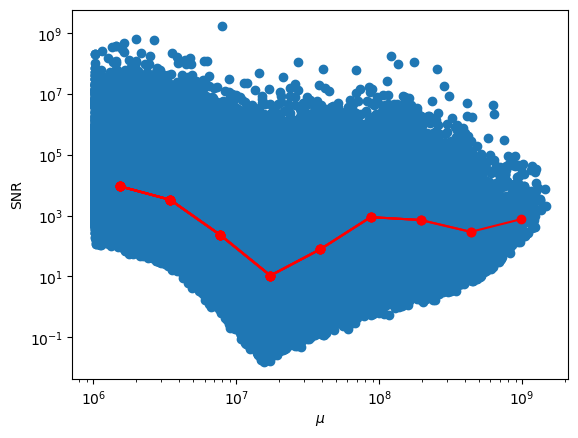

In [50]:
plt.scatter(mu[Mask],snr[Mask])
x_mean_plotter(mu[Mask],snr[Mask])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\mu$')
plt.ylabel('SNR')

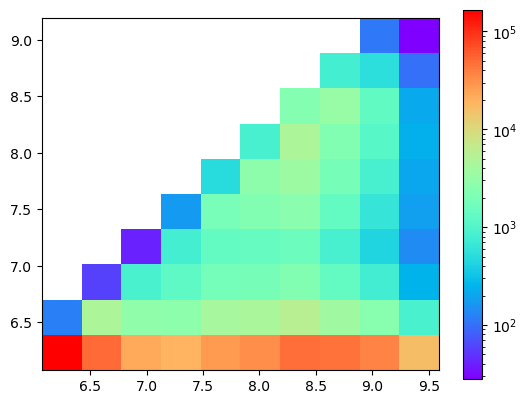

In [51]:
#plt.figure(figsize=(9,15))
#Histogram averaging for SNR
H_num, xedges, yedges = np.histogram2d(np.log10(M_1[Mask]), np.log10(M_2[Mask]), bins=(10,10))
H_z, xedges, yedges = np.histogram2d(np.log10(M_1[Mask]), np.log10(M_2[Mask]), bins=(xedges, yedges), weights=z[Mask])
H_num=H_num.T
H_z=H_z.T

#Regular histogram:
plt.imshow(H_num, interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
           cmap='rainbow', norm=matplotlib.colors.LogNorm())
#Weighted histogram
#plt.imshow(H_snr/H_num, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#plt.xscale('log')
#plt.yscale('log')
plt.colorbar()

C:\Users\karma\AppData\Local\Temp\ipykernel_20612\2273650970.py:1: RuntimeWarning: invalid value encountered in divide
  plt.imshow(H_z/H_num, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='Spectral',norm=matplotlib.colors.LogNorm())


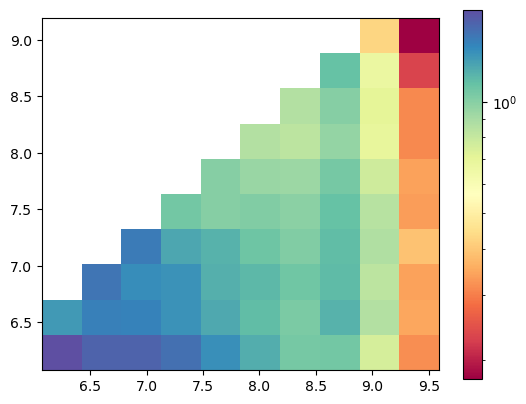

In [52]:
plt.imshow(H_z/H_num, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='Spectral',norm=matplotlib.colors.LogNorm())
plt.colorbar()

In [53]:
print(H_z/H_num)

[[1.77796023 1.63142012 1.63186182 1.54846927 1.36542365 1.21719148
  1.06005837 1.06644515 0.74967816 0.31623685]
 [1.30902412 1.4556906  1.44277699 1.34568272 1.23937015 1.13727634
  1.03824613 1.18562928 0.85782671 0.3468099 ]
 [       nan 1.51715483 1.37408142 1.35332418 1.20311484 1.1609403
  1.08018023 1.15023273 0.83217356 0.34114341]
 [       nan        nan 1.4795839  1.24439658 1.18884441 1.09291639
  1.01800257 1.13333667 0.86890819 0.38917545]
 [       nan        nan        nan 1.0671851  1.00671447 1.01759658
  0.98264298 1.11447787 0.84466676 0.33519624]
 [       nan        nan        nan        nan 1.00503452 0.94354417
  0.93287738 1.0616418  0.77271044 0.33952203]
 [       nan        nan        nan        nan        nan 0.85813145
  0.83033438 0.95981626 0.68715729 0.31210464]
 [       nan        nan        nan        nan        nan        nan
  0.8586806  0.99953194 0.70796502 0.31002111]
 [       nan        nan        nan        nan        nan        nan
         nan 

C:\Users\karma\AppData\Local\Temp\ipykernel_20612\2209997513.py:1: RuntimeWarning: invalid value encountered in divide
  print(H_z/H_num)


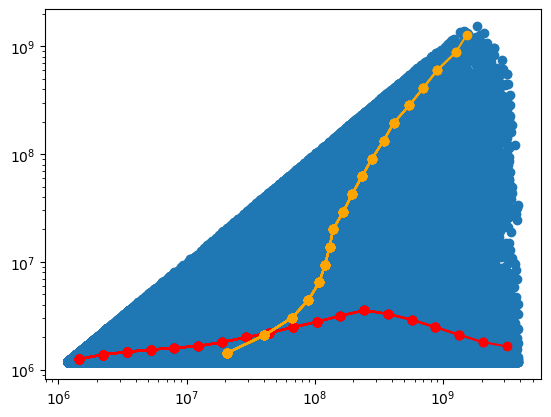

In [55]:
plt.scatter(M_1[Mask], M_2[Mask])
x_mean_plotter(M_1[Mask], M_2[Mask], xbins=20)
y_mean_plotter(M_1[Mask], M_2[Mask], ybins=20)
plt.xscale('log')
plt.yscale('log')